In [15]:
import string
from threading import local
from matplotlib import pyplot as plt
import numpy as np
import cv2
import json
import numpy as np
import os
from statistics import median, mode,mean
import matplotlib.image as img
from matplotlib.ticker import PercentFormatter
from matplotlib import colors
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
import scipy.stats as sts


In [16]:
rawfile_path = "../train_videos/737/disparity/"
annotation_path = "../train_annotations/737.json"
videoPath = '../train_videos/737/Right.mp4'

In [30]:
raw_file_list = os.listdir(rawfile_path)
raw_file_list.sort()
print(raw_file_list)



['00000000f.raw', '00000001f.raw', '00000002f.raw', '00000003f.raw', '00000004f.raw', '00000005f.raw', '00000006f.raw', '00000007f.raw', '00000008f.raw', '00000009f.raw', '00000010f.raw', '00000011f.raw', '00000012f.raw', '00000013f.raw', '00000014f.raw', '00000015f.raw', '00000016f.raw', '00000017f.raw', '00000018f.raw', '00000019f.raw', '00000020f.raw', '00000021f.raw', '00000022f.raw', '00000023f.raw', '00000024f.raw', '00000025f.raw', '00000026f.raw', '00000027f.raw', '00000028f.raw', '00000029f.raw', '00000030f.raw', '00000031f.raw', '00000032f.raw', '00000033f.raw', '00000034f.raw', '00000035f.raw', '00000036f.raw', '00000037f.raw', '00000038f.raw', '00000039f.raw', '00000040f.raw', '00000041f.raw', '00000042f.raw', '00000043f.raw', '00000044f.raw', '00000045f.raw', '00000046f.raw', '00000047f.raw', '00000048f.raw', '00000049f.raw', '00000050f.raw', '00000051f.raw', '00000052f.raw', '00000053f.raw', '00000054f.raw', '00000055f.raw', '00000056f.raw', '00000057f.raw', '00000058f.ra

In [31]:
right_image_Width=1000
right_image_height=420

In [32]:
f = open(annotation_path)

data = json.load(f)

In [33]:
data_required = data['sequence']

In [34]:
global_distance=[]
estimated_velocity=[]
actual_velocity=[]
actual_distance=[]
ratio_change=[]
n_bins= 10
n = 100

In [35]:
import matplotlib.pyplot as plt
import numpy as np



In [36]:
for indiData in data_required:
    print(indiData)

{'OwnSpeed': 52.8, 'StrDeg': 0.0, 'inf_DP': 5.737793, 'Distance_ref': 56.29, 'TgtSpeed_ref': 38.24, 'TgtXPos_LeftUp': 460.0, 'TgtYPos_LeftUp': 95.0, 'TgtWidth': 43.0, 'TgtHeight': 51.0}
{'OwnSpeed': 52.8, 'StrDeg': 0.0, 'inf_DP': 5.737793, 'Distance_ref': 55.94, 'TgtSpeed_ref': 38.43, 'TgtXPos_LeftUp': 460.0, 'TgtYPos_LeftUp': 97.0, 'TgtWidth': 43.0, 'TgtHeight': 51.0}
{'OwnSpeed': 52.7, 'StrDeg': 0.0, 'inf_DP': 5.737793, 'Distance_ref': 55.59, 'TgtSpeed_ref': 38.62, 'TgtXPos_LeftUp': 461.0, 'TgtYPos_LeftUp': 96.0, 'TgtWidth': 43.0, 'TgtHeight': 51.0}
{'OwnSpeed': 52.7, 'StrDeg': 0.0, 'inf_DP': 5.737793, 'Distance_ref': 55.22, 'TgtSpeed_ref': 38.92, 'TgtXPos_LeftUp': 461.0, 'TgtYPos_LeftUp': 95.0, 'TgtWidth': 44.0, 'TgtHeight': 52.0}
{'OwnSpeed': 52.8, 'StrDeg': 0.0, 'inf_DP': 5.737793, 'Distance_ref': 54.84, 'TgtSpeed_ref': 39.27, 'TgtXPos_LeftUp': 462.0, 'TgtYPos_LeftUp': 95.0, 'TgtWidth': 44.0, 'TgtHeight': 53.0}
{'OwnSpeed': 52.8, 'StrDeg': 0.0, 'inf_DP': 5.737793, 'Distance_ref': 

In [45]:
for x in range(len(data_required)):

    with open(rawfile_path+raw_file_list[x], 'rb') as f:
        disparity_image = f.read()
    local_distance=[]
    actual_distance=[]
    distance_change=0
    pre_distance=0
    d = [[0 for y in range(int(data_required[x]['TgtWidth']))]for a in range(int(data_required[x]['TgtHeight']))]
    print(np.array(d).shape)
    for j in range(int(data_required[x]['TgtYPos_LeftUp']),int(data_required[x]['TgtYPos_LeftUp'])+int(data_required[x]['TgtHeight'])):
        for i in range(int(data_required[x]['TgtXPos_LeftUp']),int(data_required[x]['TgtXPos_LeftUp'])+int(data_required[x]['TgtWidth'])):
            disparity_j = int((right_image_height - j - 1) / 4)  # y-coordinate
            disparity_i = int(i / 4)  # x-coordinate

            
            # Load the disparity map
            # print((disparity_j * 256 + disparity_i) * 2)
            disparity =  disparity_image[(disparity_j * 256 + disparity_i) * 2] # integer
            
            disparity += disparity_image[(disparity_j * 256 + disparity_i) * 2 + 1] / 256 # decimal
            
            if disparity > 0: 
                distance =  560 / (disparity - data_required[x]['inf_DP'])
                local_distance.append(distance)
    #             d[j-int(data_required[x]['TgtYPos_LeftUp'])][i-int(data_required[x]['TgtXPos_LeftUp'])]=distance
    
    # heatmap = plt.pcolor(d)
    # plt.colorbar(heatmap)
    # plt.show()



    

    # fig, axs = plt.subplots(1,1, figsize=(10,7), tight_layout=True)
    h,e = np.histogram(local_distance, bins=100, density=True)
    z = np.linspace(e.min(), e.max())

    # plot the histogram
    # plt.figure(figsize=(8,6))
    # plt.bar(e[:-1], h, width=np.diff(e), ec='k', align='edge', label='histogram')

    # plot the real KDE
    kde = sts.gaussian_kde(local_distance)
    # plt.plot(x, kde.pdf(x), c='C1', lw=8, label='KDE')

    # resample the histogram and find the KDE.
    resamples = np.random.choice((e[:-1] + e[1:])/2, size=n*5, p=h/h.sum())
    rkde = sts.gaussian_kde(resamples)

    # plot the KDE
    height = kde.pdf(local_distance)
    mode_value = local_distance[np.argmax(height)]
    print("without KDE")
    print(mode(local_distance))
    print("with kde")
    print(mode_value)
    print("actual_value ")
    print(data_required[x]['Distance_ref'])
    print("----------------------")
    # plt.plot(x, rkde.pdf(x), '--', c='C3', lw=4, label='resampled KDE')
    # plt.title('n = %d' % n)
    # plt.legend()
    # plt.show()

(51, 43)
without KDE
55.24204053443912
with kde
56.63884654179891
actual_value 
56.29
----------------------
(51, 43)
without KDE
54.569158466594956
with kde
56.63884654179891
actual_value 
55.94
----------------------
(51, 43)
without KDE
55.24204053443912
with kde
55.93172414433701
actual_value 
55.59
----------------------
(52, 44)
without KDE
54.569158466594956
with kde
55.24204053443912
actual_value 
55.22
----------------------
(53, 44)
without KDE
53.912471369830214
with kde
55.24204053443912
actual_value 
54.84
----------------------
(53, 45)
without KDE
53.912471369830214
with kde
54.569158466594956
actual_value 
54.49
----------------------
(54, 45)
without KDE
53.27140152396162
with kde
54.569158466594956
actual_value 
54.14
----------------------
(54, 45)
without KDE
53.27140152396162
with kde
53.912471369830214
actual_value 
53.74
----------------------
(55, 45)
without KDE
53.27140152396162
with kde
53.27140152396162
actual_value 
53.34
----------------------
(56, 45)
wit

43.852737767503456


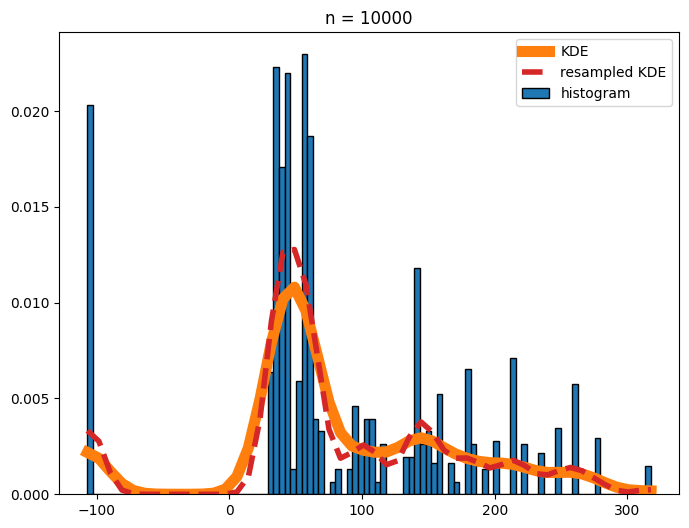

In [21]:

scipy_kernel